<a href="https://colab.research.google.com/github/Kiranmaichidurala/Myproject/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest  # Import Isolation Forest

In [ ]:
data = data.fillna(data.mean())

In [ ]:
data=pd.read_csv('/content/synthetic_network_traffic.csv')

In [ ]:
data['TotalBytes'] = data['BytesSent'] + data['BytesReceived']
data['TotalPackets'] = data['PacketsSent'] + data['PacketsReceived']

In [ ]:
anomaly_data = data[data['IsAnomaly'] == 1]
oversampled_data = pd.concat([data, anomaly_data], axis=0)

In [ ]:
X = oversampled_data.drop(columns=['IsAnomaly'])  # Features
y = oversampled_data['IsAnomaly']  # Labels

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer # Import SimpleImputer

# ... (your existing code) ...

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform
X_train = imputer.fit_transform(X_train)

# Transform the validation and test data using the trained imputer
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Now you can fit the IsolationForest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
y_pred_iforest = isolation_forest.predict(X_test)
y_pred_iforest = (y_pred_iforest == -1)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, use 'sigmoid' for anomaly detection
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/5
8138/8138 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9890 - loss: nan - val_accuracy: 0.9906 - val_loss: nan
Epoch 2/5
8138/8138 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9901 - loss: nan - val_accuracy: 0.9906 - val_loss: nan
Epoch 3/5
8138/8138 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9899 - loss: nan - val_accuracy: 0.9906 - val_loss: nan
Epoch 4/5
8138/8138 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9895 - loss: nan - val_accuracy: 0.9906 - val_loss: nan
Epoch 5/5
8138/8138 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9901 - loss: nan - val_accuracy: 0.9906 - val_loss: nan
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'], zero_division=1)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

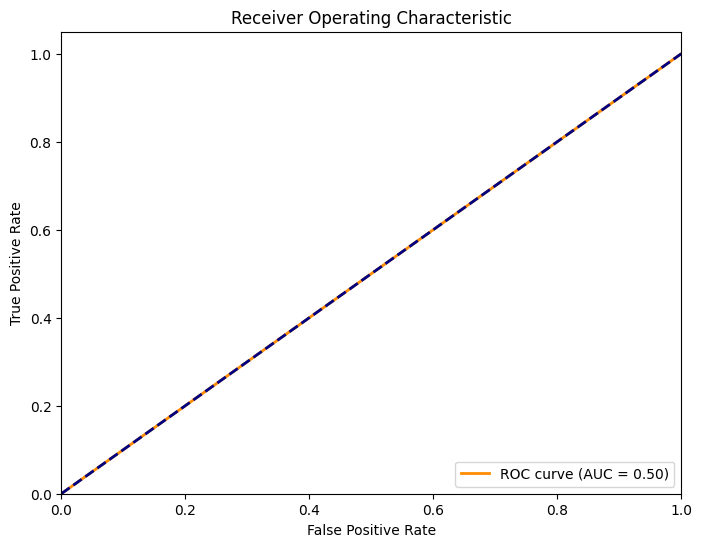

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Confusion Matrix')

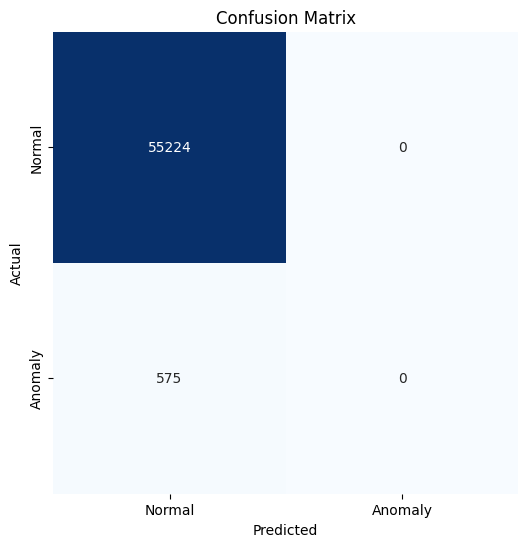

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
print(report)

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99     55224
     Anomaly       1.00      0.00      0.00       575

    accuracy                           0.99     55799
   macro avg       0.99      0.50      0.50     55799
weighted avg       0.99      0.99      0.98     55799

